# AMEX Competition - Data Exploration

This notebook was created during a live coding session on twitch.

Check out the VOD video of this stream and follow for future streams [here](https://www.twitch.tv/medallionstallion_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
color_pal = sns.color_palette()

## Reading in the Dataset
We will use the parquet format of the dataset created by @odins0n for some data exploration. Parquet format is faster, more compressed, and saves the dtypes of each column when we read and write.

[Learn more about it here in the youtube video I made.](https://www.youtube.com/watch?v=u4rsA5ZiTls)

We will subsample the training data so that the notebook does not run out of memory.

In [2]:
train = pd.read_parquet('../input/amex-parquet/train_data.parquet')
print(f'The full training data shape is: {train.shape}')
train = train.sample(100_000, random_state=529)

The full training data shape is: (5531451, 191)


# About the Data:
The features are broken down into types. We will explore each one:

- D_* = Delinquency variables
- S_* = Spend variables
- P_* = Payment variables
- B_* = Balance variables
- R_* = Risk variables

In [3]:
d_feats = [c for c in train.columns if c.startswith('D_')]
s_feats = [c for c in train.columns if c.startswith('S_')]
p_feats = [c for c in train.columns if c.startswith('P_')]
b_feats = [c for c in train.columns if c.startswith('B_')]
r_feats = [c for c in train.columns if c.startswith('R_')]

In [4]:
print(f'Number of Delinquency variables: {len(d_feats)}')
print(f'Number of Spend variables: {len(s_feats)}')
print(f'Number of Payment variables: {len(p_feats)}')
print(f'Number of Balance variables: {len(b_feats)}')
print(f'Number of Risk variables: {len(r_feats)}')

Number of Delinquency variables: 96
Number of Spend variables: 22
Number of Payment variables: 3
Number of Balance variables: 40
Number of Risk variables: 28


# Distribution of the Target

 24.86% of the Training Data Defaults


<AxesSubplot:title={'center':'Distribution of Target'}>

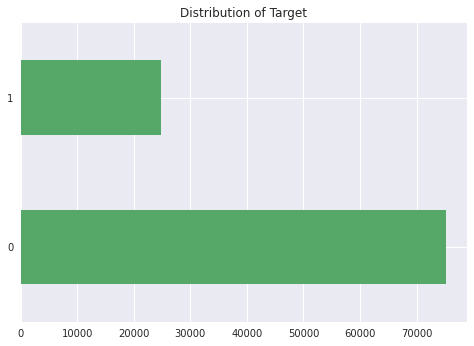

In [5]:
pct_default = train['target'].mean()
print(f'{(pct_default *100): 0.2f}% of the Training Data Defaults')
train['target'].value_counts() \
    .plot(kind='barh',
          title='Distribution of Target',
          color=color_pal[1])

# How many Null Values by Features

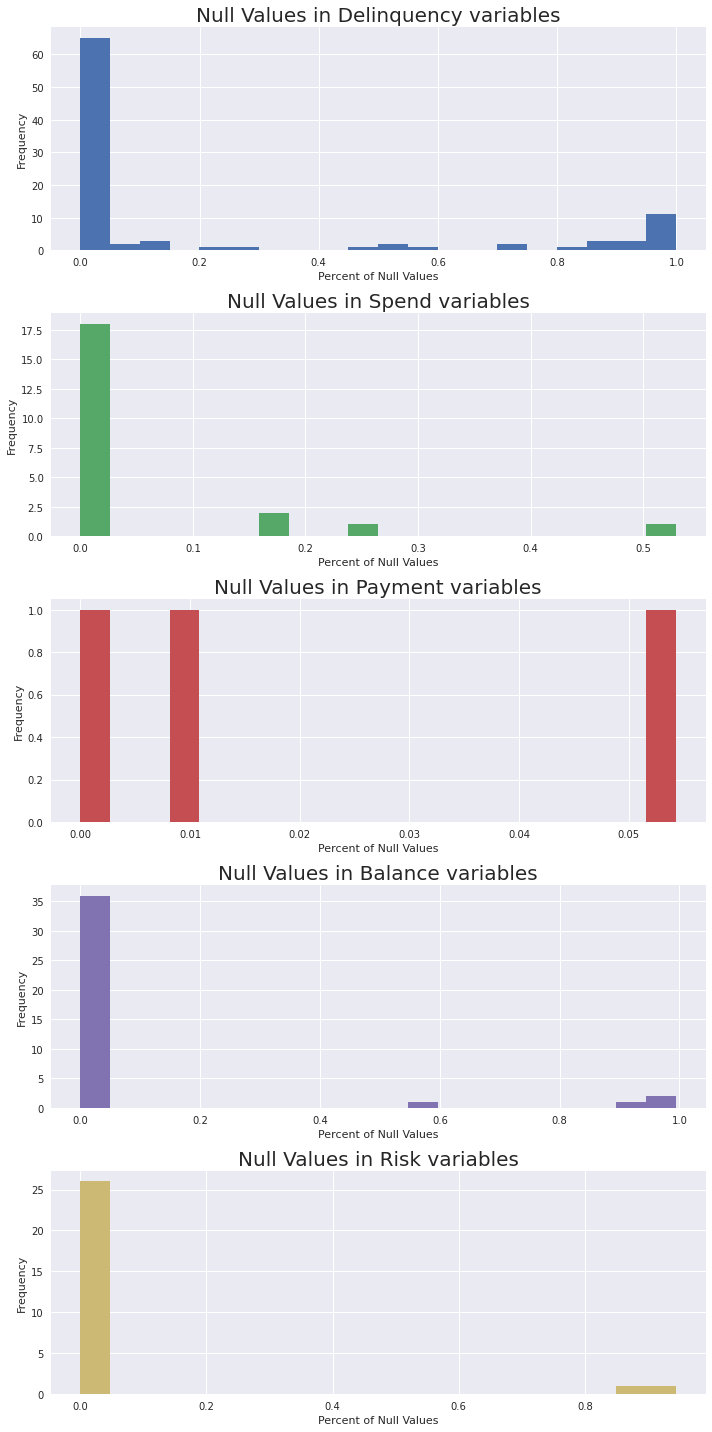

In [6]:
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
train[d_feats].isna().mean() \
    .plot(kind='hist', bins=20, color=color_pal[0], ax=axs[0])
axs[0].set_title('Null Values in Delinquency variables', fontsize=20)
axs[0].set_xlabel('Percent of Null Values')

train[s_feats].isna().mean() \
    .plot(kind='hist', bins=20, color=color_pal[1], ax=axs[1])
axs[1].set_title('Null Values in Spend variables', fontsize=20)
axs[1].set_xlabel('Percent of Null Values')

train[p_feats].isna().mean() \
    .plot(kind='hist', bins=20, color=color_pal[2], ax=axs[2])
axs[2].set_title('Null Values in Payment variables', fontsize=20)
axs[2].set_xlabel('Percent of Null Values')

train[b_feats].isna().mean() \
    .plot(kind='hist', bins=20, color=color_pal[3], ax=axs[3])
axs[3].set_title('Null Values in Balance variables', fontsize=20)
axs[3].set_xlabel('Percent of Null Values')

train[r_feats].isna().mean() \
    .plot(kind='hist', bins=20, color=color_pal[4], ax=axs[4])
axs[4].set_title('Null Values in Risk variables', fontsize=20)
axs[4].set_xlabel('Percent of Null Values')
plt.tight_layout()
plt.show()

In [7]:
# Look at 10 D features
train[d_feats[:10]].describe().T

,count,mean,std,min,25%,50%,75%,max
D_39,100000.0,0.153575,0.272083,7.173539e-08,0.004506,0.009057,0.236585,5.360279
D_41,99964.0,0.060102,0.202719,8.376773e-08,0.002886,0.005781,0.008657,6.694801
D_42,14194.0,0.183541,0.223457,-8.219692e-05,0.037423,0.121171,0.251186,4.181584
D_43,70195.0,0.154058,0.213318,1.900746e-06,0.042470,0.088063,0.183556,9.146683
D_44,94886.0,0.118633,0.223136,6.780261e-08,0.003789,0.007618,0.131892,3.130957
D_45,99964.0,0.252080,0.241568,1.812577e-05,0.055092,0.182207,0.372833,1.590458
D_46,78101.0,0.475668,0.166159,-1.598665e+00,0.425676,0.459613,0.517772,4.583724
D_47,100000.0,0.407271,0.234257,-2.661408e-02,0.232926,0.384347,0.561273,1.365529
D_48,87067.0,0.381410,0.326088,-9.607698e-03,0.080375,0.286145,0.667362,3.298239
D_49,9773.0,0.187224,0.213674,6.881980e-06,0.062438,0.131653,0.243642,7.119828


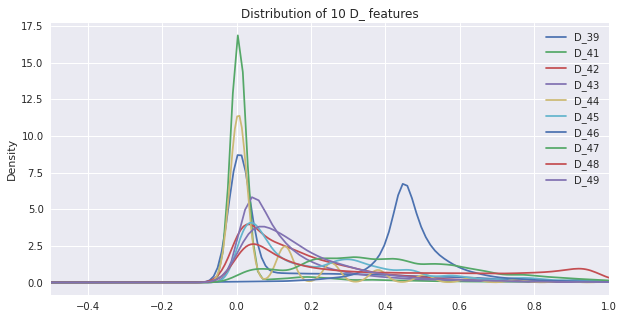

In [8]:
ax = train[d_feats[:10]] \
    .plot(kind='kde', figsize=(10, 5))
ax.set_title('Distribution of 10 D_ features')
ax.set_xlim(-0.5, 1)
plt.show()

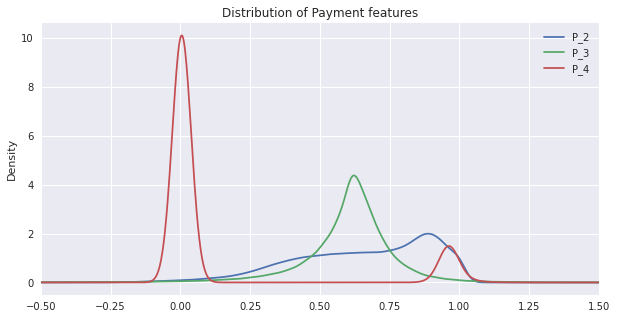

In [9]:
ax = train[p_feats] \
    .plot(kind='kde', figsize=(10, 5))
ax.set_title('Distribution of Payment features')
ax.set_xlim(-0.5, 1.5)
plt.show()

# Plot Each Feature by Target

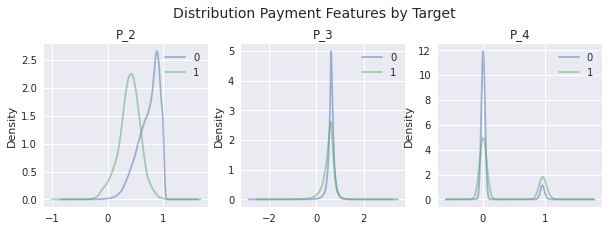

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    train.groupby('target')[p_feats[i]] \
        .plot(kind='kde',
              title=p_feats[i], alpha=0.5, ax=axs[i])
    axs[i].legend()
fig.suptitle('Distribution Payment Features by Target',
             y=1.05, fontsize=14)
plt.show()

# Non-Numeric Features

There are some features that are non-numeric!

They are:
- S_2
- D_63
- D_64

In [11]:
train.select_dtypes('object').columns

Index(['customer_ID', 'S_2', 'D_63', 'D_64'], dtype='object')

In [12]:
train['S_2_date'] = pd.to_datetime(train['S_2'])

## S_2 (Date) Feature Exploration

<AxesSubplot:title={'center':'Target by Date'}, xlabel='S_2_date'>

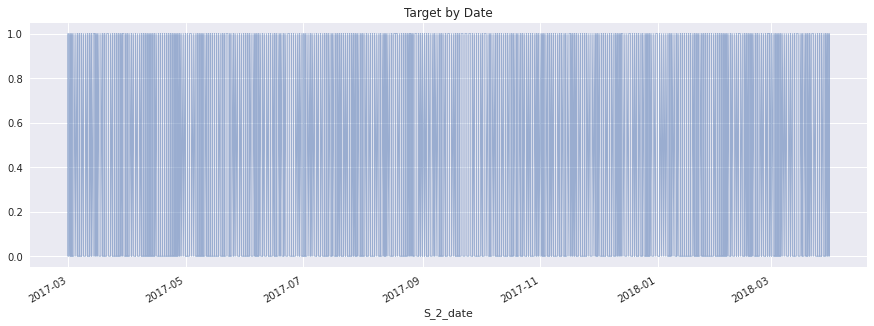

In [13]:
train.set_index('S_2_date')['target'] \
    .plot(figsize=(15, 5), lw=1, alpha=0.5,
          title='Target by Date')

# Categorical Feature Exploration

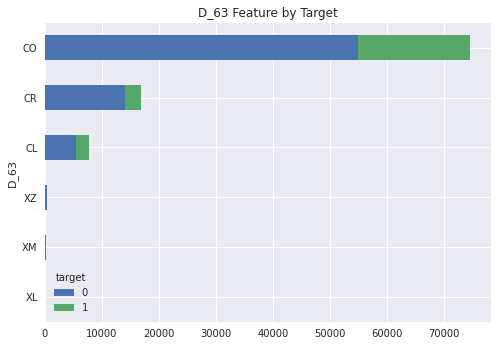

In [14]:
train.groupby('D_63')['target'].value_counts() \
    .unstack() \
    .sort_values(0) \
    .plot(kind='barh', stacked=True,
                    title='D_63 Feature by Target')
plt.show()

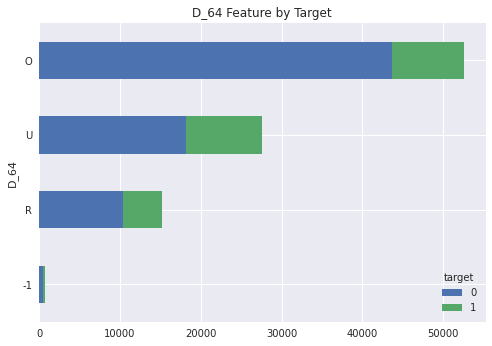

In [15]:
train.groupby('D_64')['target'].value_counts() \
    .unstack() \
    .sort_values(0) \
    .plot(kind='barh', stacked=True,
                    title='D_64 Feature by Target')
plt.show()

# Find the Correlation of Features with Target

In [16]:
numeric_feats = train.select_dtypes('float32').columns
feats = [c for c in train.columns if c not in ['customer_ID', 'target']]
feat_corrs = {}
for f in numeric_feats:
    feat_corr = np.corrcoef(train[f].fillna(0), train['target'])[0, 1]
    feat_corrs[f] = feat_corr

# Most and Least Correlated Features with the Target

<AxesSubplot:title={'center':'Top Correlated Features with Target'}>

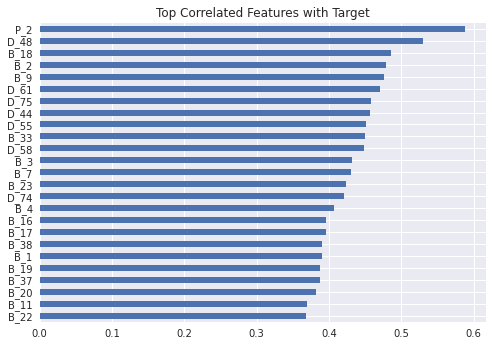

In [17]:
pd.Series(feat_corrs).abs().sort_values(ascending=False).head(25) \
     .sort_values() \
    .plot(kind='barh', title='Top Correlated Features with Target')

<AxesSubplot:title={'center':'Least Correlated Features with Target'}>

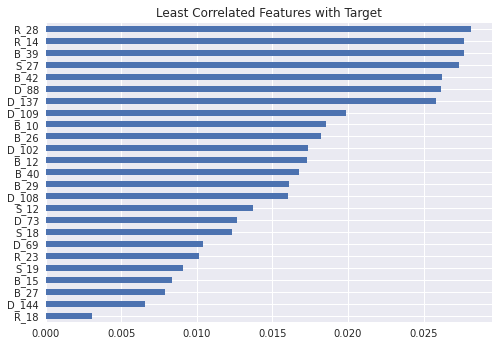

In [18]:
pd.Series(feat_corrs).abs().sort_values(ascending=True).head(25) \
    .plot(kind='barh', title='Least Correlated Features with Target')

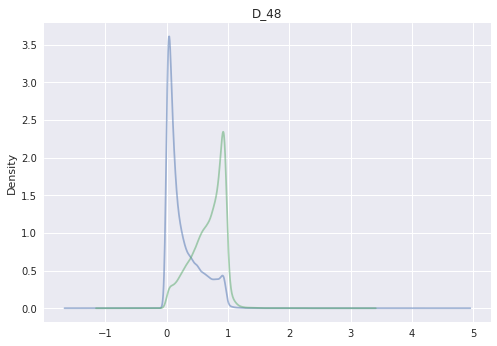

In [19]:
ax = train.groupby('target')['D_48'] \
    .plot(kind='kde',
          title='D_48', alpha=0.5)